In [3]:
import pandas as pd
import math
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)
# install the ucimlrepo
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
diabetes_data = fetch_ucirepo(id=296) 
  
# features and ids as pandas DataFrames
data_ids = diabetes_data.data.ids
data_features = diabetes_data.data.features
data_target = diabetes_data.data.targets

C:\Users\kehin\anaconda3\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [7]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\kehin\Downloads\diabetes+130-us+hospitals+for+years+1999-2008\diabetic_data.csv'
df = pd.read_csv(file_path)

# Preview the first few rows
print(df.head())

   encounter_id  patient_nbr             race  gender      age weight  admission_type_id  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?                  6   
1        149190     55629189        Caucasian  Female  [10-20)      ?                  1   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?                  1   
3        500364     82442376        Caucasian    Male  [30-40)      ?                  1   
4         16680     42519267        Caucasian    Male  [40-50)      ?                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital  ... citoglipton insulin  \
0                        25                    1                 1  ...          No      No   
1                         1                    7                 3  ...          No      Up   
2                         1                    7                 2  ...          No      No   
3                         1                    7                 2 

In [9]:
# add a dummy column to merge
data_ids.loc[:, 'merge_temp'] = data_ids.index
data_features.loc[:, 'merge_temp'] = data_features.index
data_target.loc[:, 'merge_temp'] = data_target.index

# merge into one DataFrame
data_temp = data_ids.merge(data_features, on='merge_temp')

data_raw = data_temp.merge(data_target, on='merge_temp')

del data_temp

data_raw = data_raw.drop(columns = 'merge_temp')

print(data_raw.columns, '\n')

print(data_raw.shape)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object') 

(101766, 50)


C:\Users\kehin\AppData\Local\Temp\ipykernel_2792\2302750055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ids.loc[:, 'merge_temp'] = data_ids.index
C:\Users\kehin\AppData\Local\Temp\ipykernel_2792\2302750055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features.loc[:, 'merge_temp'] = data_features.index
C:\Users\kehin\AppData\Local\Temp\ipykernel_2792\2302750055.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [11]:
# Check available columns
print(df.columns)

# Define your target column (for example, predicting readmission)
target_col = 'readmitted'  # or 'readmit_binary' if you already created it

# Create features (X) and target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

# If you're going to merge again after preprocessing, use df.merge() carefully.

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')


In [13]:
# remove missing/unnecesary features
dropped_columns = ['encounter_id', 'weight', 'payer_code', 'medical_specialty']

data_raw = data_raw.drop(columns = dropped_columns)

print(data_raw.shape)

(101766, 46)


In [15]:
# Check unique values in 'race' before cleaning
print(df['race'].unique())

['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


In [17]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv(file_path)

# Drop unneeded columns
columns_to_drop = ['encounter_id', 'weight', 'payer_code', 'medical_specialty']
df = df.drop(columns=columns_to_drop)

# Remove rows with missing race
df = df[df['race'] != '?']  # Fix is here!

# Replace remaining NaNs with -1
df = df.replace(np.nan, -1)

# Replace specific columns' missing values with 'N/A'
cols_to_replace = ['diag_1', 'diag_2', 'diag_3', 'A1Cresult', 'max_glu_serum']
df[cols_to_replace] = df[cols_to_replace].replace(-1, 'N/A')

# Check shape
print(df.shape)

(99493, 46)


In [19]:
expired_or_hospice_ids = [
    11,  # Expired
    13,  # Hospice/home
    14,  # Hospice/medical facility
    19,  # Expired at home (Medicaid only, hospice)
    20,  # Expired in a medical facility (Medicaid only, hospice)
    21   # Expired, place unknown (Medicaid only, hospice)
]

df = df[~df['discharge_disposition_id'].isin(expired_or_hospice_ids)]

print(df.shape)

(97109, 46)


In [21]:
# write cleaned (no missing values) dataset to file
df.to_csv('./data/dataset_clean.csv', index=False)


In [23]:
import os

# Create the 'data' folder if it doesn't exist
os.makedirs('data', exist_ok=True)

# Now save the dataframe
df.to_csv('./data/dataset_clean.csv', index=False)

In [33]:
 import pandas as pd

# Load the CSV using the absolute path
data = pd.read_csv(r'C:\Users\kehin\Downloads\data_processed.csv')

# Check the first few rows to confirm
print(data.head())


   age  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  \
0    0                  6                        25                    1                 1   
1    1                  1                         1                    7                 3   
2    2                  1                         1                    7                 2   
3    3                  1                         1                    7                 2   
4    4                  1                         1                    7                 1   

   num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  ...  \
0                  41               0                1                  0                 0  ...   
1                  59               0               18                  0                 0  ...   
2                  11               5               13                  2                 0  ...   
3                  44              

In [35]:
print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97108 entries, 0 to 97107
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       97108 non-null  int64 
 1   admission_type_id         97108 non-null  int64 
 2   discharge_disposition_id  97108 non-null  int64 
 3   admission_source_id       97108 non-null  int64 
 4   time_in_hospital          97108 non-null  int64 
 5   num_lab_procedures        97108 non-null  int64 
 6   num_procedures            97108 non-null  int64 
 7   num_medications           97108 non-null  int64 
 8   number_outpatient         97108 non-null  int64 
 9   number_emergency          97108 non-null  int64 
 10  number_inpatient          97108 non-null  int64 
 11  number_diagnoses          97108 non-null  int64 
 12  max_glu_serum             97108 non-null  int64 
 13  A1Cresult                 97108 non-null  int64 
 14  metformin             

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#  data is already loaded into 'data'
# and that the target column is named 'readmitted' or similar
# Replace 'readmitted' below with your actual target column name

# Check unique values in your target column
print(data['readmitted'].value_counts())

readmitted
NO     51018
>30    34964
<30    11126
Name: count, dtype: int64


In [39]:
# If target is categorical like '<30', '>30', 'NO', convert to binary
data['readmitted_binary'] = data['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

# Prepare features and target
X = data.drop(['readmitted', 'readmitted_binary'], axis=1)
y = data['readmitted_binary']


In [41]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

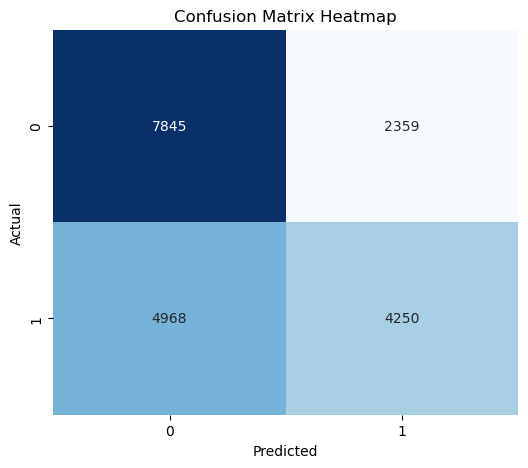

Confusion Matrix:
 [[7845 2359]
 [4968 4250]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.77      0.68     10204
           1       0.64      0.46      0.54      9218

    accuracy                           0.62     19422
   macro avg       0.63      0.61      0.61     19422
weighted avg       0.63      0.62      0.61     19422



In [47]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data (make sure X_test_scaled and model are already defined)
y_pred = model.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Print confusion matrix and classification report for detailed metrics
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
